In [1]:
import os
import pandas as pd
import geopandas as gpd

# os.environ["USE_PYGEOS"] = os.environ.get("USE_PYGEOS", "0")
local_crs = 32636
# path to data
example_data_path = "./data"

In [2]:
# load aggregated info we have
aggregated_blocks = gpd.read_parquet(os.path.join(example_data_path, "data_getter_blocks.parquet"))
accessibility_matrix = pd.read_pickle(os.path.join(example_data_path, "data_getter_matrix.pickle"))

In [4]:
# load data required for service graphs creation
schools = gpd.read_parquet(os.path.join(example_data_path, "schools.parquet"))
kindergartens = gpd.read_parquet(os.path.join(example_data_path, "kindergartens.parquet"))
recreational_areas = gpd.read_parquet(os.path.join(example_data_path, "recreational_areas.parquet")).rename_geometry('geometry')

hospitals = gpd.read_file(os.path.join(example_data_path, "hospitals.geojson"))
pharmacies = gpd.read_file(os.path.join(example_data_path, "pharmacies.geojson"))
policlinics = gpd.read_file(os.path.join(example_data_path, "policlinics.geojson"))

# services should be specified as a dictionary
services = {"schools": schools, "kindergartens": kindergartens, "recreational_areas": recreational_areas,
            "hospitals": hospitals, "pharmacies": pharmacies, "policlinics": policlinics}

In [5]:
from masterplan_tools import CityModel

city_model = CityModel(
  blocks=aggregated_blocks, 
  accessibility_matrix=accessibility_matrix, 
  services=services
)

/Users/mvin/Desktop/masterplanning/env/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [6]:
city_model.visualize()

In [7]:
from masterplan_tools import ProvisionModel

services_prov = {}

for service_type in city_model.get_service_types():
    provision = ProvisionModel(city_model=city_model, service_name=service_type)
    services_prov[service_type] = provision.run(overflow=False)
    print(service_type)

schools
kindergartens
recreational_areas
hospitals
pharmacies
policlinics


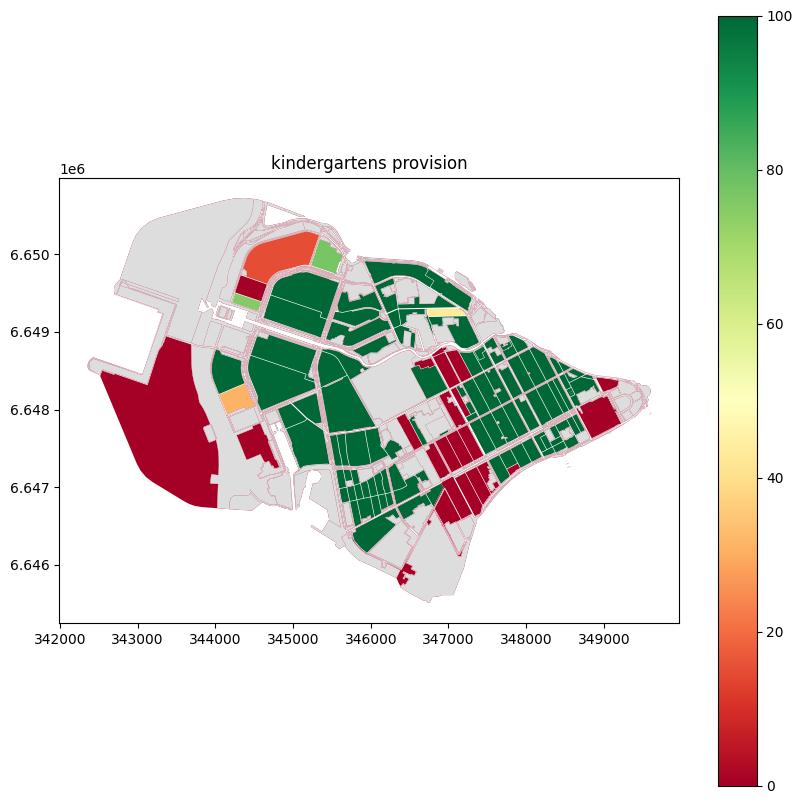

In [8]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

fig = plt.figure(figsize=(10, 10))
gs = GridSpec(1, 1, figure=fig)

ax1 = fig.add_subplot(gs[0, 0])
services_prov["kindergartens"].plot(column="provision_kindergartens", legend=True, ax=ax1, cmap='RdYlGn')
ax1.set_title('kindergartens provision')
services_prov["kindergartens"][services_prov["kindergartens"]["population"] == 0].plot(ax=ax1, color="#ddd", alpha=1)

plt.show()


In [9]:
# import matplotlib.pyplot as plt
# from matplotlib.gridspec import GridSpec

# def show_me_chart(fig, gs, prov, name, i):
#   ax = fig.add_subplot(gs[i//3, i%3])
#   prov.plot(column="provision_"+name, legend=True, ax=ax, cmap='RdYlGn')
#   ax.set_title(name +" provision")
#   prov[prov["population"] == 0].plot(ax=ax, color="#ddd", alpha=1)


# kindergartens_prov = services_prov["kindergartens"]
# schools_prov = services_prov["schools"]
# recreational_areas_prov = services_prov["recreational_areas"]
# hospitals_prov = services_prov["hospitals"]
# pharmacies_prov = services_prov["pharmacies"]
# policlinics_prov = services_prov["policlinics"]

# fig = plt.figure(figsize=(25, 15))
# gs = GridSpec(2, 3, figure=fig)

# i = 0
# for service_type in services_prov:
#   show_me_chart(fig, gs, services_prov[service_type], service_type, i)
#   i = i+1

# plt.show()

In [10]:
df_filtered_1 = services_prov["kindergartens"][services_prov["kindergartens"]["provision_kindergartens"] > 0]
kindergartens_all = df_filtered_1["provision_kindergartens"].sum(numeric_only=True) / len(df_filtered_1)

df_filtered_2 = services_prov["schools"][services_prov["schools"]["provision_schools"] > 0]
schools_all = df_filtered_2["provision_schools"].sum(numeric_only=True) / len(df_filtered_2)

df_filtered_3 = services_prov["recreational_areas"][
    services_prov["recreational_areas"]["provision_recreational_areas"] > 0
]
recreational_areas_all = df_filtered_3["provision_recreational_areas"].sum(numeric_only=True) / len(df_filtered_3)
total_prov = (kindergartens_all + schools_all + recreational_areas_all) / 3

print(f"Total provision before {total_prov}")

Total provision before 99.0465122148193
